Name: Pervin Mine Gökşen

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from LR import LineerRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [3]:
df = df.drop(columns = ['Gender'])
df.head()

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


# EDA (Exploratory Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  500 non-null    int64
 1   Weight  500 non-null    int64
 2   Index   500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


Index :

0 - Extremely Weak

1 - Weak

2 - Normal

3 - Overweight

4 - Obesity

5 - Extreme Obesity

/Users/pervinminegoksen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/pervinminegoksen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


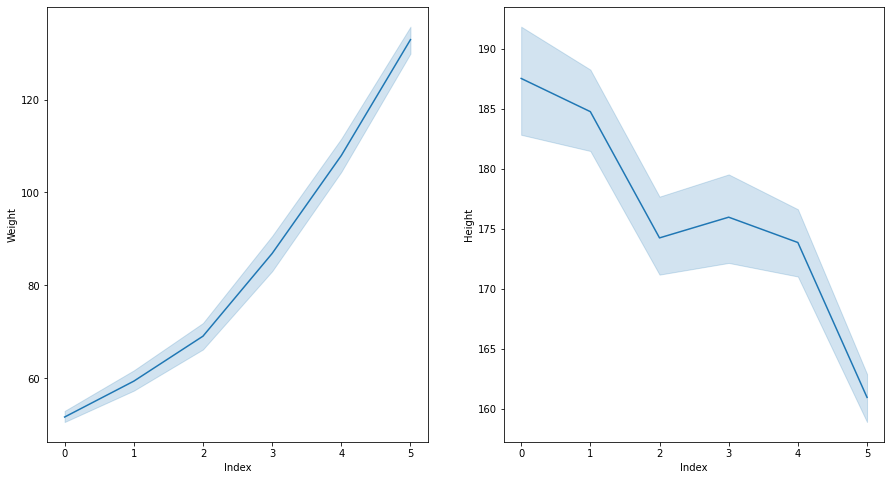

In [5]:
fig, ax= plt.subplots(1,2, figsize=(15,8))
sns.lineplot(df['Index'],df['Weight'], ax=ax[0])
sns.lineplot(df['Index'],df['Height'], ax=ax[1])
plt.show()

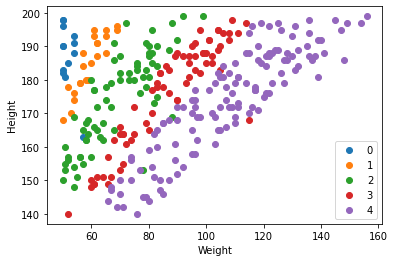

In [6]:
index = [0,1,2,3,4,5]
for i in range(0,5):
    x = df[df['Index'] == index[i]]
    plt.scatter(x['Weight'],x['Height'], label = index[i])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()  

<AxesSubplot:>

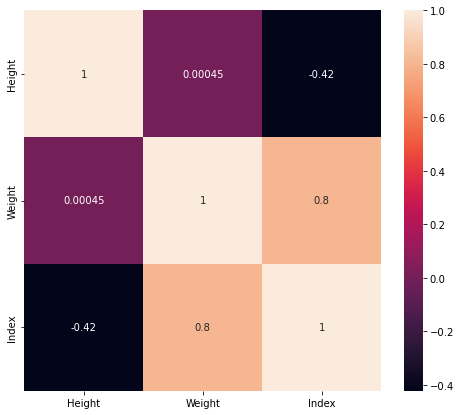

In [7]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(df.corr(), annot=True)

# Split Data as Train and Test

In [8]:
clf = LineerRegression(learning_rate=0.000005, epoches=1000)

In [9]:
x=df.values.tolist();
y=[];
for row in x:
    y.append(int(row[2]));
    del row[2];
x=pd.Series(x);
y=pd.Series(y);
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True);

x_train_list=x_train.values.tolist();
y_train_list=y_train.values.tolist();
x_test_list=x_test.values.tolist();
y_test_list=y_test.values.tolist();

In [10]:
clf.fit(x_train_list,y_train_list)
clf.m1

-0.0016220036654651937

In [11]:
yhat = clf.predict(x_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);
xhat = clf.predict(x_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat);

Test Features Expected Classification
[3, 5, 0, 5, 0, 4, 3, 5, 4, 5, 2, 3, 3, 5, 5, 5, 4, 4, 5, 4, 4, 5, 2, 5, 2, 4, 2, 1, 3, 5, 2, 5, 5, 3, 3, 5, 1, 5, 1, 2, 0, 5, 5, 1, 5, 4, 5, 5, 5, 5, 4, 5, 4, 0, 5, 4, 5, 5, 5, 5, 3, 2, 4, 5, 4, 5, 5, 4, 4, 4, 3, 5, 3, 3, 5, 5, 4, 5, 5, 5, 5, 2, 2, 3, 5, 5, 4, 5, 2, 4, 4, 5, 5, 5, 4, 4, 4, 3, 2, 5, 4, 5, 2, 5, 4, 5, 2, 4, 5, 2, 5, 4, 5, 3, 5, 2, 5, 5, 3, 4, 2, 2, 5, 2, 4, 1, 1, 5, 2, 0, 0, 3, 1, 2, 5, 1, 4, 5, 2, 4, 4, 3, 3, 5, 4, 4, 5, 3, 5, 4, 5, 5, 5, 5, 4, 4, 5, 4, 3, 5, 5, 4, 4, 5, 2, 2, 2, 4, 5, 3, 5, 5, 5, 5, 4, 3, 2, 2, 2, 1, 5, 5, 1, 2, 4, 5, 5, 3, 4, 2, 4, 2, 3, 5, 3, 2, 5, 3, 5, 5, 1, 4, 4, 5, 4, 0, 4, 0, 4, 5, 4, 4, 3, 5, 2, 4, 5, 5, 5, 3, 5, 5, 4, 4, 5, 5, 2, 5, 2, 2, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5]
Prediction
[3.4112936722151708, 5.574072147193044, 1.7143373209617045, 3.821079901547054, 1.5655512943820966, 3.3244397081788093, 3.224905638074295, 2.997079742530083, 3.20322774391211, 4.169525914846828, 1.8855

In [13]:
 r2_score(y_test_list, yhat)

0.680267237907165